<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/UniqueItems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [ ]:
def unique_Naive(L):
  
def unique_Sort(L):
  
def unique_Hash(L):
  

Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random
DOMAIN = 100 ##Você deve escolher um domínio mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
 
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [unique_Naive, unique_Sort, unique_Hash]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1 

sizes = [5,10,15,20,25] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=500
Starting round 2, size=1000
Starting round 3, size=1500
Starting round 4, size=2000
Starting round 5, size=2500
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
unique_Naive##500,0.024823,unique_Naive,500
unique_Sort##500,0.000234,unique_Sort,500
unique_Hash##500,0.000142,unique_Hash,500
unique_Naive##1000,0.096164,unique_Naive,1000
unique_Sort##1000,0.000476,unique_Sort,1000
unique_Hash##1000,0.000180,unique_Hash,1000
unique_Naive##1500,0.239475,unique_Naive,1500
unique_Sort##1500,0.000789,unique_Sort,1500
unique_Hash##1500,0.000320,unique_Hash,1500
unique_Naive##2000,0.421320,unique_Naive,2000


Resultado do experimento (gráfico)

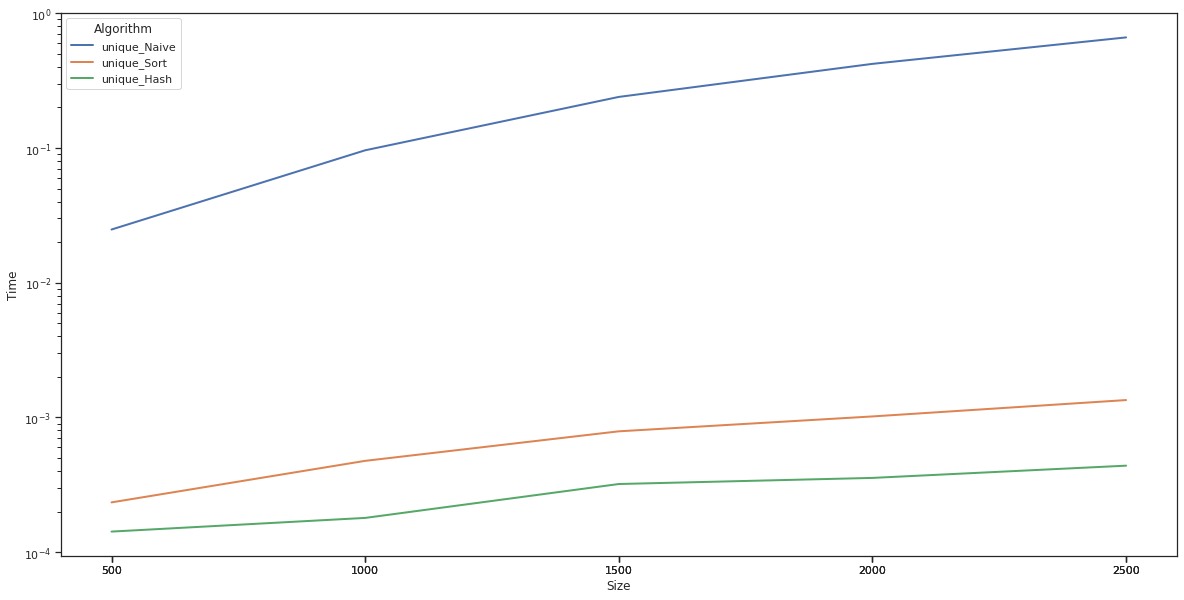

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()